In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
import pandas as pd
pd.set_option('display.max_columns', None)
# pd.reset_option('display.max_columns')

In [47]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install category_encoders --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [5]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 25.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [1]:
import pickle
from sklearn.ensemble import RandomForestClassifier

# Ruta del archivo PKL
ruta_archivo = '/content/drive/Shareddrives/MDS+6 _IDEALISTA/experiment_RandomForestRegressor_20240311-121124/model/model.pkl'

# Abre el archivo en modo de lectura binaria ('rb')
with open(ruta_archivo, 'rb') as f:
    # Carga el contenido del archivo PKL
    modelo_rf = pickle.load(f)

# Ahora puedes utilizar el modelo Random Forest cargado
modelo_rf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['area_construida',
                                                   'n_habitaciones', 'n_banos',
                                                   'terraza', 'ascensor',
                                                   'aire_acondicionado',
                                                   'amueblado', 'parking',
                                                   'precio_parking',
                                                   'orientacion_n',
                                                   'orientacion_s',
                                                   'orientacion_e',
                                                   'orientac...
                                                   'duplex', 'estudio', 'arico',
                                                   'n_piso', 'cat_n_max_pisos',
                                                   'cat_n_vecinos',
                                                   'cat_calidad', 'buen_estado',
                                                   'distancia_puerta_sol',
                                                   'distancia_metro',
                                                   'distancia_castellana',
                                                   'longitud', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   TargetEncoder())]),
                                                  ['barrio'])],
                                   verbose_feature_names_out=False)),
                ('model', RandomForestRegressor())])

In [12]:
df_train = pd.read_csv('https://raw.githubusercontent.com/anamartiiins/MDS6-IDEALISTA/main_am/output_data/df_train_util_v2.csv')
df_train = df_train.drop(['Unnamed: 0'], axis=1)
df_test = pd.read_csv('https://github.com/anamartiiins/MDS6-IDEALISTA/raw/main_am/output_data/df_test_util.csv')

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58214 entries, 0 to 58213
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   precio                          58214 non-null  int64  
 1   precio_unitario_m2              58214 non-null  float64
 2   area_construida                 58214 non-null  int64  
 3   n_habitaciones                  58214 non-null  int64  
 4   n_banos                         58214 non-null  int64  
 5   terraza                         58214 non-null  int64  
 6   ascensor                        58214 non-null  int64  
 7   aire_acondicionado              58214 non-null  int64  
 8   amueblado                       58214 non-null  int64  
 9   parking                         58214 non-null  int64  
 10  precio_parking                  58214 non-null  int64  
 11  orientacion_n                   58214 non-null  int64  
 12  orientacion_s                   

In [14]:
df_train.columns

Index(['precio', 'precio_unitario_m2', 'area_construida', 'n_habitaciones',
       'n_banos', 'terraza', 'ascensor', 'aire_acondicionado', 'amueblado',
       'parking', 'precio_parking', 'orientacion_n', 'orientacion_s',
       'orientacion_e', 'orientacion_o', 'trastero', 'armarios', 'piscina',
       'portero', 'jardin', 'duplex', 'estudio', 'arico', 'n_piso',
       'cat_n_max_pisos', 'cat_n_vecinos', 'cat_calidad', 'buen_estado',
       'distancia_puerta_sol', 'distancia_metro', 'distancia_castellana',
       'longitud', 'latitud', 'precio_logaritmico', 'cusec', 'barrio',
       'interior', 'antiguidade', 'precio_mean_barrio',
       'precio_unitario_m2_mean_barrio', 'precio_logaritmico_mean_barrio'],
      dtype='object')

In [15]:
df_test.columns

Index(['precio_unitario_m2', 'area_construida', 'n_habitaciones', 'n_banos',
       'terraza', 'ascensor', 'aire_acondicionado', 'amueblado', 'parking',
       'precio_parking', 'orientacion_n', 'orientacion_s', 'orientacion_e',
       'orientacion_o', 'trastero', 'armarios', 'piscina', 'portero', 'jardin',
       'duplex', 'estudio', 'arico', 'n_piso', 'cat_n_max_pisos',
       'cat_n_vecinos', 'cat_calidad', 'buen_estado', 'distancia_puerta_sol',
       'distancia_metro', 'distancia_castellana', 'longitud', 'latitud',
       'precio', 'geometry', 'precio_logaritmico', 'cusec', 'barrio_id',
       'barrio', 'precio_mean_barrio', 'precio_unitario_m2_mean_barrio',
       'interior', 'antiguidade'],
      dtype='object')

In [18]:
columnas_train_no_test = [col for col in df_train.columns if col not in df_test.columns]
print("Columnas en df_train pero no en df_test:")
print(columnas_train_no_test)

Columnas en df_train pero no en df_test:
['precio_logaritmico_mean_barrio']


In [20]:
import numpy as np

# Calcular logaritmo de 'precio_mean_barrio' en df_test
df_test['precio_logaritmico_mean_barrio'] = np.log1p(df_test['precio_mean_barrio'])

In [23]:
# Obtener el orden de las columnas de df_train
columnas_df_train = df_train.columns

# Reordenar las columnas de df_test de acuerdo con el orden de df_train
df_test = df_test[columnas_df_train]

In [28]:
import pandas as pd
import numpy as np

def evaluate_regresion_model(model, df_test=df_test, columna='precio'):
    """
    Evalua un modelo de regresión utilizando un conjunto de prueba y calcula métricas de rendimiento.

    Parámetros:
    - model: Modelo de regresión entrenado.
    - df_test: DataFrame de prueba que contiene características donde nos se ha entrenado.
    - columna: Nombre de la columna objetivo en el DataFrame (por defecto, 'precio').

    Salida:
    Retorna un DataFrame:
    1. df_test_evaluacion: DataFrame con las predicciones y métricas para cada muestra en el conjunto de prueba.
    """

    # Obtener características utilizadas durante el entrenamiento del modelo
    features_modelo = model.feature_names_in_

    # Encontrar las columnas comunes entre las características del modelo y el conjunto de prueba
    columnas_comunes = [col for col in features_modelo if col in df_test.columns]

    # Seleccionar y reordenar las columnas del conjunto de prueba según las características del modelo
    df_prueba_modelo = df_test[columnas_comunes].copy()

    # Encontrar las características faltantes en el conjunto de prueba
    caracteristicas_faltantes_en_prueba = list(set(features_modelo) - set(df_prueba_modelo.columns))

    # Crear un DataFrame con las columnas faltantes y rellenarlas con valores 0
    df_faltantes = pd.DataFrame(0, index=df_prueba_modelo.index, columns=caracteristicas_faltantes_en_prueba)

    # Concatenar el DataFrame faltante con el conjunto de prueba
    df_prueba_modelo = pd.concat([df_prueba_modelo, df_faltantes], axis=1)

    # Organizar las columnas para que sigan el orden original de las características del modelo
    df_prueba_modelo = df_prueba_modelo[features_modelo]

    # Convertir el conjunto de datos en un DataFrame para mantener las columnas
    X_test = pd.DataFrame(df_prueba_modelo, columns=features_modelo)

    # Realizar predicciones
    predicciones = model.predict(X_test)

    # Hacer una copia para evitar modificar el DataFrame original
    df_test_evaluacion = df_test.copy()

    # Agregar las predicciones al DataFrame de prueba
    df_test_evaluacion['predicciones'] = predicciones

    # Calcular métricas de evaluación con y_true primero
    df_test_evaluacion['error'] = df_test_evaluacion[columna] - df_test_evaluacion['predicciones']
    df_test_evaluacion['absolute_error'] = abs(df_test_evaluacion[columna] - df_test_evaluacion['predicciones'])
    df_test_evaluacion['percentage_error'] = ((df_test_evaluacion[columna] - df_test_evaluacion['predicciones']) / df_test_evaluacion[columna]) * 100
    df_test_evaluacion['absolute_percentage_error'] = (abs(df_test_evaluacion[columna] - df_test_evaluacion['predicciones']) / df_test_evaluacion[columna]) * 100

    return df_test_evaluacion


In [32]:
df_test_evaluacion = evaluate_regresion_model(modelo_rf, columna='precio_unitario_m2' )

In [41]:
df_test_evaluacion.columns

Index(['precio', 'precio_unitario_m2', 'area_construida', 'n_habitaciones',
       'n_banos', 'terraza', 'ascensor', 'aire_acondicionado', 'amueblado',
       'parking', 'precio_parking', 'orientacion_n', 'orientacion_s',
       'orientacion_e', 'orientacion_o', 'trastero', 'armarios', 'piscina',
       'portero', 'jardin', 'duplex', 'estudio', 'arico', 'n_piso',
       'cat_n_max_pisos', 'cat_n_vecinos', 'cat_calidad', 'buen_estado',
       'distancia_puerta_sol', 'distancia_metro', 'distancia_castellana',
       'longitud', 'latitud', 'precio_logaritmico', 'cusec', 'barrio',
       'interior', 'antiguidade', 'precio_mean_barrio',
       'precio_unitario_m2_mean_barrio', 'precio_logaritmico_mean_barrio',
       'predicciones', 'error', 'absolute_error', 'percentage_error',
       'absolute_percentage_error'],
      dtype='object')

# Primer plot

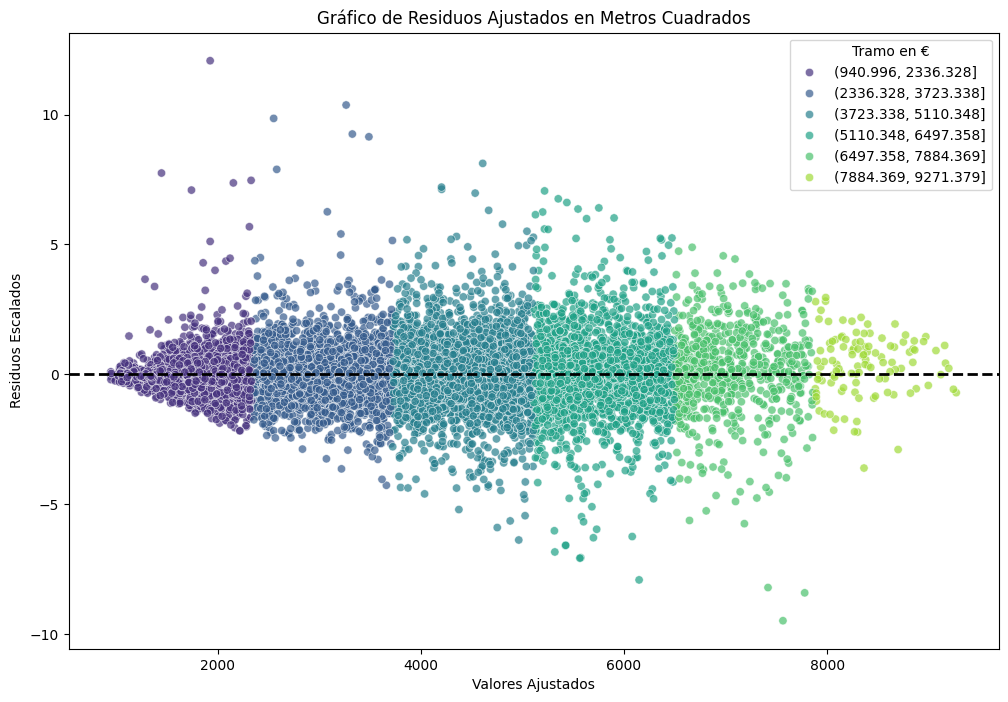

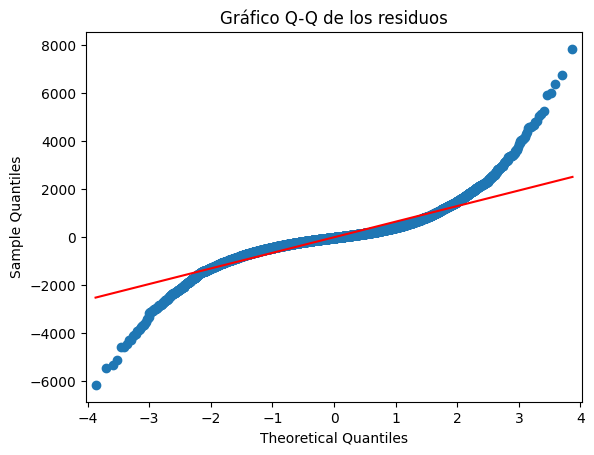

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

# Calcular los residuos
residuos_originales = df_test_evaluacion['precio_unitario_m2'] - df_test_evaluacion['predicciones']

# Escalar los residuos dividiendo por la desviación estándar
residuos_escalados = residuos_originales / np.std(residuos_originales)

# Crear un DataFrame para facilitar el plotting
df_residuos = pd.DataFrame({'Ajustados': df_test_evaluacion['predicciones'], 'Residuos_Escalados': residuos_escalados})

# Dividir los datos en 6 tramos
df_residuos['Tramo'] = pd.cut(df_residuos['Ajustados'], bins=6)

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Ajustados', y='Residuos_Escalados', hue='Tramo', data=df_residuos, palette='viridis', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)  # Línea horizontal en y=0
plt.title('Gráfico de Residuos Ajustados en Metros Cuadrados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos Escalados')
plt.legend(title='Tramo en €')
plt.show()


# Crear un gráfico Q-Q de los residuos
sm.qqplot(df_test_evaluacion['precio_unitario_m2'] - df_test_evaluacion['predicciones'], line='s')
plt.title('Gráfico Q-Q de los residuos')
plt.show()

## Análisis por barrios

In [48]:
# Calcular MAPE, R2 y MSE para el conjunto de datos completo
mape_general = mean_absolute_percentage_error(df_test_evaluacion['precio_unitario_m2'], df_test_evaluacion['predicciones'])
r2_general = r2_score(df_test_evaluacion['precio_unitario_m2'], df_test_evaluacion['predicciones'])
mse_general = mean_squared_error(df_test_evaluacion['precio_unitario_m2'], df_test_evaluacion['predicciones'])

print("\nMétricas Generales:")
print(f"MAPE General: {mape_general}")
print(f"R2 General: {r2_general}")
print(f"MSE General: {mse_general}")


Métricas Generales:
MAPE General: 0.12570221726484648
R2 General: 0.8534223545599007
MSE General: 420947.1407172805


In [118]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score, mean_squared_error

# Calcular MAPE, R2 y RMSE por barrio
df_metrics_por_barrio = df_test_evaluacion.groupby('barrio').apply(lambda x: pd.Series({
    'MAPE': mean_absolute_percentage_error(x['precio_unitario_m2'], x['predicciones']),
    'R2': r2_score(x['precio_unitario_m2'], x['predicciones']),
    'RMSE': mean_squared_error(x['precio_unitario_m2'], x['predicciones'], squared=False)
})).reset_index()

In [64]:
df_metrics_por_barrio.sort_values(by='MAPE', ascending=False).head(5)

,barrio,MAPE,R2,RMSE
46,El Cañaveral - Los Berrocales,0.520932,-1.608665,1001.865542
4,Aeropuerto,0.387165,-0.002095,734.620551
118,Sol,0.245047,0.351229,1166.575365
48,El Plantío,0.234325,-0.872771,1490.733084
104,Recoletos,0.221925,0.503069,1296.558834


In [119]:
# Contar la cantidad de observaciones por barrio en df_test
observaciones_por_barrio = df_test.groupby('barrio').size().reset_index(name='observaciones_test')

# Merge para agregar la columna 'observaciones' al DataFrame df_metrics_por_barrio
df_metrics_por_barrio = df_metrics_por_barrio.merge(observaciones_por_barrio, on='barrio', how='left')

In [120]:
# Contar la cantidad de observaciones por barrio en df_train
observaciones_por_barrio_train = df_train.groupby('barrio').size().reset_index(name='observaciones_train')

# Merge para agregar la columna 'observaciones' al DataFrame df_metrics_por_barrio
df_metrics_por_barrio = df_metrics_por_barrio.merge(observaciones_por_barrio_train, on='barrio', how='left')

In [68]:
df_metrics_por_barrio.sort_values(by='MAPE', ascending=False).head(5)

,barrio,MAPE,R2,RMSE,observaciones_test,observaciones_train
46,El Cañaveral - Los Berrocales,0.520932,-1.608665,1001.865542,28,7
4,Aeropuerto,0.387165,-0.002095,734.620551,8,24
118,Sol,0.245047,0.351229,1166.575365,176,535
48,El Plantío,0.234325,-0.872771,1490.733084,4,2
104,Recoletos,0.221925,0.503069,1296.558834,185,627


Primer Insight, no hay suficiente variables en algunos datos, ya sea por mala partición o por magias de los bosques

In [73]:
df_metrics_por_barrio.iloc[df_metrics_por_barrio['observaciones_train'].sort_values(ascending=True).head(10).index]

,barrio,MAPE,R2,RMSE,observaciones_test,observaciones_train
48,El Plantío,0.234325,-0.872771,1490.733084,4,2
46,El Cañaveral - Los Berrocales,0.520932,-1.608665,1001.865542,28,7
43,Cuatro Vientos,0.093560,0.867838,246.363164,4,16
47,El Pardo,0.133278,-0.379896,623.429218,4,21
4,Aeropuerto,0.387165,-0.002095,734.620551,8,24
60,Horcajo,0.121278,0.363979,467.884366,8,30
17,Atalaya,0.070221,0.651326,381.862921,12,46
16,Arroyo del Fresno,0.074116,0.104586,392.874356,13,50
55,Fuentelarreina,0.068946,0.627533,306.962995,15,60
88,Palomas,0.099082,0.786961,467.585040,19,79


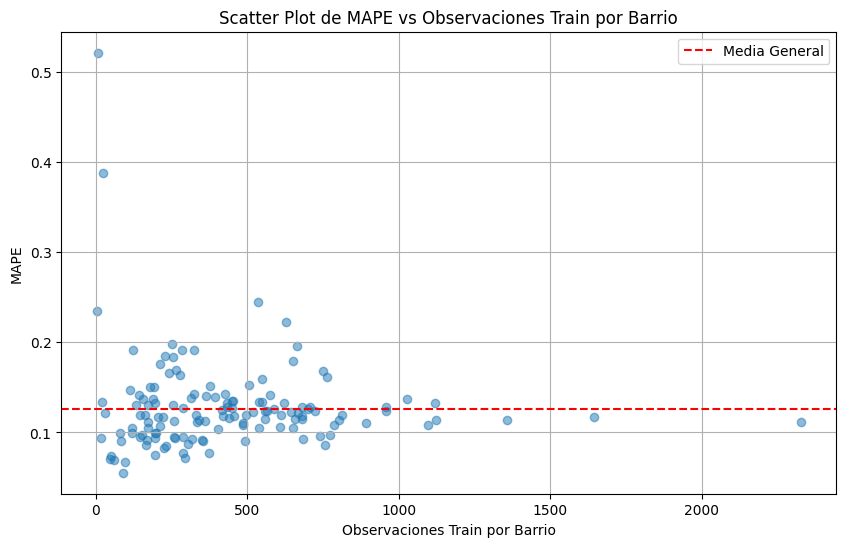

In [80]:
import matplotlib.pyplot as plt

# Crear el scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_metrics_por_barrio['observaciones_train'], df_metrics_por_barrio['MAPE'], alpha=0.5)
plt.axhline(y=0.12570221726484648, color='r', linestyle='--', label='Media General')
plt.title('Scatter Plot de MAPE vs Observaciones Train por Barrio')
plt.xlabel('Observaciones Train por Barrio')
plt.ylabel('MAPE')
plt.grid(True)
plt.legend()
plt.show()

Se observa que hay varios barrios que tienen muy pocas observaciones y por lo tanto son aleatorios

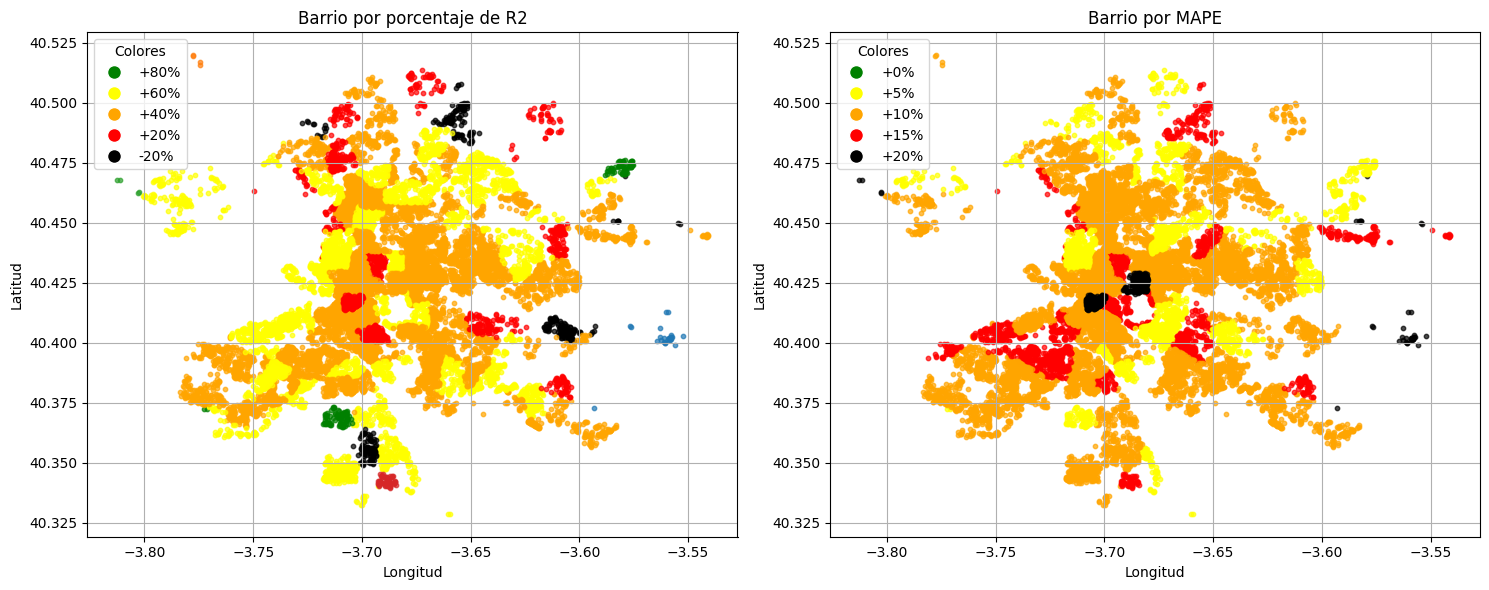

In [128]:
import matplotlib.pyplot as plt

# Define los rangos de colores basados en el MAPE para el primer gráfico
colores_r2 = {
    'Green': (0.8, 1),
    'Yellow': (0.6, 0.8),
    'Orange': (0.4, 0.6),
    'Red': (0.2, 0.4),
    'Black': (-0.2, 0.2)
}

# Función para asignar el color según el rango de MAPE para el primer gráfico
def assign_color_r2(mape):
    for color, (min_mape, max_mape) in colores_r2.items():
        if min_mape <= mape < max_mape:
            return color
    return None

# Añadir una nueva columna 'color' a df_metrics_por_barrio para el primer gráfico
df_metrics_por_barrio['color_r2'] = df_metrics_por_barrio['R2'].apply(assign_color_r2)

# Define los rangos de colores basados en el MAPE para el segundo gráfico
colores_mape = {
    'Green': (0, 0.05),
    'Yellow': (0.05, 0.10),
    'Orange': (0.10, 0.15),
    'Red': (0.15, 0.20),
    'Black': (0.20, 1.0)
}

# Función para asignar el color según el rango de MAPE para el segundo gráfico
def assign_color_mape(mape):
    for color, (min_mape, max_mape) in colores_mape.items():
        if min_mape <= mape < max_mape:
            return color
    return None

# Añadir una nueva columna 'color' a df_metrics_por_barrio para el segundo gráfico
df_metrics_por_barrio['color_mape'] = df_metrics_por_barrio['MAPE'].apply(assign_color_mape)

# Crear subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Primer gráfico
axs[0].set_title('Barrio por porcentaje de R2')
for barrio, data in df_test.groupby('barrio'):
    color = df_metrics_por_barrio[df_metrics_por_barrio['barrio'] == barrio]['color_r2'].values[0]
    axs[0].scatter(data['longitud'], data['latitud'], label=barrio, color=color, alpha=0.7, s=10)

# Añadir leyenda personalizada para el primer gráfico
legend_labels_r2 = {
    'Green': '+80%',
    'Yellow': '+60%',
    'Orange': '+40%',
    'Red': '+20%',
    'Black': '-20%'
}
handles_r2 = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markerfacecolor=color, markersize=10) for color, label in legend_labels_r2.items()]
axs[0].legend(handles=handles_r2, title='Colores', loc='upper left')
axs[0].set_xlabel('Longitud')
axs[0].set_ylabel('Latitud')
axs[0].grid(True)

# Segundo gráfico
axs[1].set_title('Barrio por MAPE')
for barrio, data in df_test.groupby('barrio'):
    color = df_metrics_por_barrio[df_metrics_por_barrio['barrio'] == barrio]['color_mape'].values[0]
    axs[1].scatter(data['longitud'], data['latitud'], label=barrio, color=color, alpha=0.7, s=10)

# Añadir leyenda personalizada para el segundo gráfico
legend_labels_mape = {
    'Green': '+0%',
    'Yellow': '+5%',
    'Orange': '+10%',
    'Red': '+15%',
    'Black': '+20%'
}
handles_mape = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markerfacecolor=color, markersize=10) for color, label in legend_labels_mape.items()]
axs[1].legend(handles=handles_mape, title='Colores', loc='upper left')
axs[1].set_xlabel('Longitud')
axs[1].set_ylabel('Latitud')
axs[1].grid(True)

# Ajustes finales
plt.tight_layout()
plt.show()

Se observa que el modelo es nefasto es términos de predicción y de explicabilidad de las variables pero sin embargo, pese a lo que pudiera parecer en primera instancia, no siempre el R2 va de la mano con el MAPE

In [129]:
len(df_train)/len(df_metrics_por_barrio)

431.2148148148148

Bien, en vista de que la media de observaciones por barrio es 431, los que tengan menos de 100 en df_train serán expulsados de este análisis

In [135]:
# Filtrar las filas con 100 o más observaciones
df_filtered = df_metrics_por_barrio[df_metrics_por_barrio['observaciones_train'] >= 100]

In [136]:
df_filtered

,barrio,MAPE,R2,RMSE,observaciones_test,observaciones_train,color,color_r2,color_mape
0,12 de Octubre-Orcasur,0.130174,0.753031,278.737257,49,173,Orange,Yellow,Orange
1,Abrantes,0.110319,0.731997,283.830387,118,484,Orange,Yellow,Orange
2,Acacias,0.133973,0.554222,633.228434,184,547,Orange,Orange,Orange
3,Adelfas,0.072060,0.482189,576.660191,80,293,Yellow,Orange,Yellow
5,Alameda de Osuna,0.099019,0.561395,411.367553,56,197,Yellow,Orange,Yellow
...,...,...,...,...,...,...,...,...,...
130,Vinateros,0.074886,0.386141,269.842106,59,194,Yellow,Red,Yellow
131,Virgen del Cortijo - Manoteras,0.150516,0.745847,557.656076,45,179,Red,Yellow,Red
132,Vista Alegre,0.117957,0.634253,296.627545,242,679,Orange,Yellow,Orange
133,Zofío,0.132296,0.477505,290.687321,62,195,Orange,Orange,Orange


In [140]:
df_filtered[['MAPE', 'R2', 'RMSE']].mean()

MAPE      0.125244
R2        0.527559
RMSE    556.748560
dtype: float64

In [142]:
df_metrics_por_barrio[['MAPE', 'R2', 'RMSE']].mean()

MAPE      0.128118
R2        0.497388
RMSE    554.165813
dtype: float64

Es peor incluso, a más observaciones posea el entrenamiento, peor lo hace el modelo

# Segundo Plot

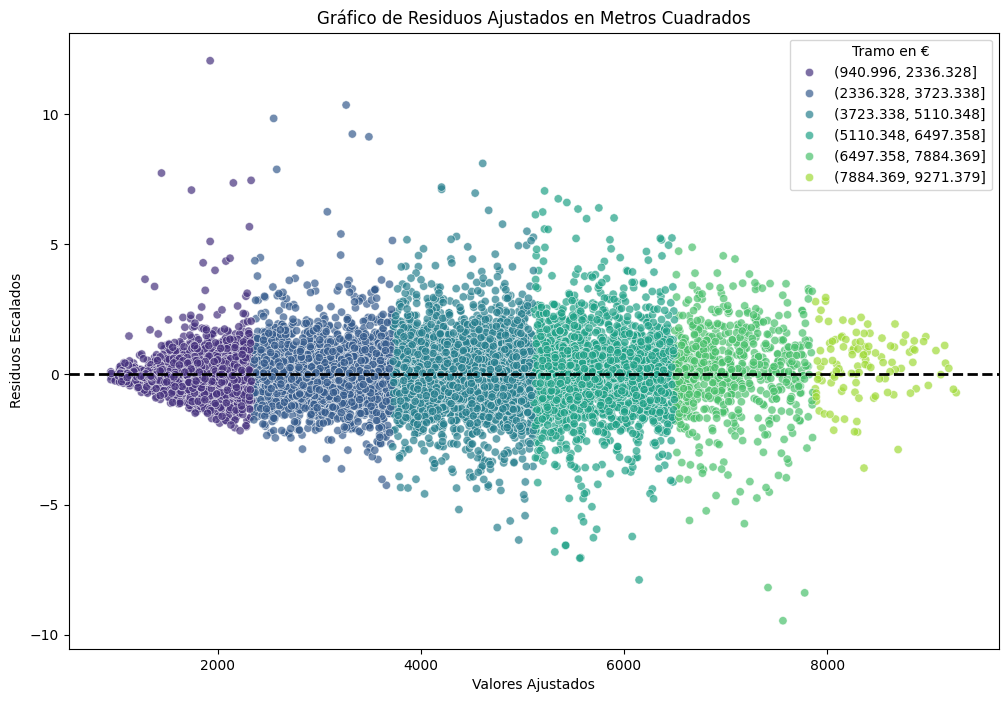

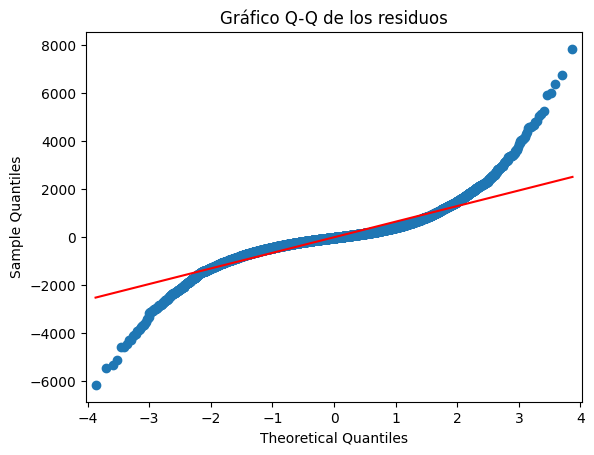

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

# Paso 1: Obtener los barrios que tienen menos o igual a 100 observaciones
barrios_con_menos_de_100 = df_metrics_por_barrio[df_metrics_por_barrio['observaciones_train'] <= 100]['barrio']

# Paso 2: Filtrar df_test_evaluation para eliminar las filas con estos barrios
filtered_df_test_evaluation = df_test_evaluacion[~df_test['barrio'].isin(barrios_con_menos_de_100)]

# Calcular los residuos
residuos_originales = filtered_df_test_evaluation['precio_unitario_m2'] - filtered_df_test_evaluation['predicciones']

# Escalar los residuos dividiendo por la desviación estándar
residuos_escalados = residuos_originales / np.std(residuos_originales)

# Crear un DataFrame para facilitar el plotting
df_residuos = pd.DataFrame({'Ajustados': filtered_df_test_evaluation['predicciones'], 'Residuos_Escalados': residuos_escalados})

# Dividir los datos en 6 tramos
df_residuos['Tramo'] = pd.cut(df_residuos['Ajustados'], bins=6)

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Ajustados', y='Residuos_Escalados', hue='Tramo', data=df_residuos, palette='viridis', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)  # Línea horizontal en y=0
plt.title('Gráfico de Residuos Ajustados en Metros Cuadrados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos Escalados')
plt.legend(title='Tramo en €')
plt.show()


# Crear un gráfico Q-Q de los residuos
sm.qqplot(df_test_evaluacion['precio_unitario_m2'] - df_test_evaluacion['predicciones'], line='s')
plt.title('Gráfico Q-Q de los residuos')
plt.show()

Es exactamente igual, parece que las predicciones random se contraponen unas a otras y acaba dando la media. Bien, veamos outliers por barrio ahora

In [152]:
filtered_df_test_evaluation

,precio,precio_unitario_m2,area_construida,n_habitaciones,n_banos,terraza,ascensor,aire_acondicionado,amueblado,parking,precio_parking,orientacion_n,orientacion_s,orientacion_e,orientacion_o,trastero,armarios,piscina,portero,jardin,duplex,estudio,arico,n_piso,cat_n_max_pisos,cat_n_vecinos,cat_calidad,buen_estado,distancia_puerta_sol,distancia_metro,distancia_castellana,longitud,latitud,precio_logaritmico,cusec,barrio,interior,antiguidade,precio_mean_barrio,precio_unitario_m2_mean_barrio,precio_logaritmico_mean_barrio,predicciones,error,absolute_error,percentage_error,absolute_percentage_error
0,352000,3520.000000,100,3,2,0,1,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,9,149,5.0,1,4.509540,0.407469,0.705524,-3.698409,40.456892,12.771386,2807906056,Cuzco-Castillejos,1,53,475914.062500,4240.057287,13.072995,3298.854785,221.145215,221.145215,6.282535,6.282535
1,192000,4800.000000,40,1,1,0,0,1,3,0,1,0,1,0,0,0,1,0,0,0,0,0,0,2.0,4,21,4.0,1,1.193985,0.266464,1.177000,-3.707325,40.406207,12.165251,2807901032,Lavapiés-Embajadores,0,108,293623.029772,4367.293246,12.590055,4759.255831,40.744169,40.744169,0.848837,0.848837
2,424000,5971.830986,71,1,1,1,1,1,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0.0,5,18,4.0,1,0.545804,0.184744,1.207110,-3.708079,40.412933,12.957489,2807901012,Palacio,1,45,498252.747253,4866.850536,13.118865,3907.377799,2064.453187,2064.453187,34.569853,34.569853
3,130000,2096.774194,62,2,1,1,0,0,3,0,1,1,1,0,0,0,1,0,0,0,0,0,1,3.0,4,8,7.0,1,3.741431,0.457775,2.020486,-3.670767,40.394290,11.775290,2807913041,San Diego,1,56,126311.229947,1836.446105,11.746512,1769.268037,327.506157,327.506157,15.619524,15.619524
4,543000,4936.363636,110,4,2,0,1,0,3,0,1,0,1,0,1,1,1,0,1,0,0,0,0,3.0,11,33,5.0,1,5.035330,0.058210,1.073704,-3.677300,40.457081,13.204865,2807905060,Bernabéu-Hispanoamérica,1,47,704627.802691,5074.517811,13.465426,5053.604011,-117.240375,117.240375,-2.375035,2.375035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18375,141000,2043.478261,69,3,1,0,0,0,3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0,6,22,7.0,1,3.218150,0.207954,2.356618,-3.722831,40.391580,11.856515,2807911037,Opañel,1,54,171824.468085,2275.395755,12.054235,2040.656615,2.821646,2.821646,0.138081,0.138081
18376,636000,3533.333333,180,5,3,1,1,0,3,1,1,0,1,1,0,0,1,0,1,0,0,0,1,8.0,8,165,6.0,1,7.091260,0.243528,2.930556,-3.720865,40.478953,13.362954,2807908149,Peñagrande,1,38,351096.330275,3388.874892,12.768819,3734.895207,-201.561873,201.561873,-5.704581,5.704581
18377,445000,3771.186441,118,3,1,0,1,1,3,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1.0,8,24,6.0,1,3.158686,0.081329,1.738040,-3.669207,40.427173,13.005830,2807904034,Goya,1,77,672634.749035,5767.523328,13.418959,4504.141227,-732.954786,732.954786,-19.435655,19.435655
18378,135000,2288.135593,59,2,1,0,1,0,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0.0,5,11,7.0,0,5.049910,0.714518,3.826015,-3.647935,40.400808,11.813030,2807914046,Fontarrón,0,56,184190.243902,2160.418795,12.123730,1967.103549,321.032044,321.032044,14.030289,14.030289


## Empiezan los Insights serios

In [156]:
!pip install requests --quiet

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
from zipfile import ZipFile
import tempfile
import shutil
import os

# URL del archivo zip en GitHub
zip_url = 'https://github.com/anamartiiins/MDS6-IDEALISTA/raw/main/input_data/L%C3%ADmites%20de%20los%20Barrios%20Administrativos%20de%20Madrid.zip'

# Descargar el archivo zip
response = requests.get(zip_url)

# Crear una carpeta temporal
temp_dir = tempfile.mkdtemp()

# Guardar el archivo zip en la carpeta temporal
zip_path = os.path.join(temp_dir, 'barrios_madrid.zip')
with open(zip_path, 'wb') as zip_file:
    zip_file.write(response.content)

# Extraer el contenido del zip en la carpeta temporal
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(temp_dir)

# Obtener el nombre del archivo shapefile (.shp)
shapefile_name = None
for filename in os.listdir(temp_dir):
    if filename.endswith('.shp'):
        shapefile_name = filename
        break

# Si se encontró el shapefile, cargarlo usando geopandas
if shapefile_name:
    shapefile_path = os.path.join(temp_dir, shapefile_name)
    gdf_barrios_madrid = gpd.read_file(shapefile_path)

# Eliminar la carpeta temporal después de usarla
shutil.rmtree(temp_dir)

In [167]:
gdf_barrios_madrid=gdf_barrios_madrid.drop(['OBJECTID',	'geodb_oid',	'CODDIS',	'NOMDIS',	'CODBAR',	'CODDISTRIT',	'CODBARRIO',	'ORIG_FID'], axis=1)

In [168]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Calcular centroides y agregarlos como una nueva columna 'centroid'
gdf_barrios_madrid['centroid'] = gdf_barrios_madrid['geometry'].centroid

In [207]:
gdf_barrios_madrid

,NOMBRE,geometry,centroid
0,San Cristobal,"POLYGON ((441930.867 4466853.189, 441929.463 4...",POINT (441533.802 4465820.907)
1,Butarque,"POLYGON ((444144.857 4464473.211, 443940.236 4...",POINT (442559.778 4465394.096)
2,Los Angeles,"POLYGON ((441147.728 4466374.483, 441111.738 4...",POINT (440632.532 4467482.211)
3,Los Rosales,"POLYGON ((442098.826 4468081.978, 442132.060 4...",POINT (441536.596 4467464.760)
4,"Villaverde Alto, Casco Histórico de Villaverde","POLYGON ((440129.276 4468362.078, 440048.482 4...",POINT (439786.705 4465896.736)
...,...,...,...
126,Valverde,"POLYGON ((444287.336 4484763.244, 444287.334 4...",POINT (442483.612 4483501.173)
127,El Goloso,"POLYGON ((440620.784 4492208.433, 440620.465 4...",POINT (440716.002 4487307.227)
128,El Pardo,"POLYGON ((444560.283 4499365.173, 444582.369 4...",POINT (435018.710 4489409.578)
129,Casco histórico de Vicálvaro,"POLYGON ((451105.959 4473770.708, 450310.703 4...",POINT (450789.395 4471000.985)


In [208]:
df_test_evaluacion

,precio,precio_unitario_m2,area_construida,n_habitaciones,n_banos,terraza,ascensor,aire_acondicionado,amueblado,parking,precio_parking,orientacion_n,orientacion_s,orientacion_e,orientacion_o,trastero,armarios,piscina,portero,jardin,duplex,estudio,arico,n_piso,cat_n_max_pisos,cat_n_vecinos,cat_calidad,buen_estado,distancia_puerta_sol,distancia_metro,distancia_castellana,longitud,latitud,precio_logaritmico,cusec,barrio,interior,antiguidade,precio_mean_barrio,precio_unitario_m2_mean_barrio,precio_logaritmico_mean_barrio,predicciones,error,absolute_error,percentage_error,absolute_percentage_error
0,352000,3520.000000,100,3,2,0,1,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,9,149,5.0,1,4.509540,0.407469,0.705524,-3.698409,40.456892,12.771386,2807906056,Cuzco-Castillejos,1,53,475914.062500,4240.057287,13.072995,3298.854785,221.145215,221.145215,6.282535,6.282535
1,192000,4800.000000,40,1,1,0,0,1,3,0,1,0,1,0,0,0,1,0,0,0,0,0,0,2.0,4,21,4.0,1,1.193985,0.266464,1.177000,-3.707325,40.406207,12.165251,2807901032,Lavapiés-Embajadores,0,108,293623.029772,4367.293246,12.590055,4759.255831,40.744169,40.744169,0.848837,0.848837
2,424000,5971.830986,71,1,1,1,1,1,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0.0,5,18,4.0,1,0.545804,0.184744,1.207110,-3.708079,40.412933,12.957489,2807901012,Palacio,1,45,498252.747253,4866.850536,13.118865,3907.377799,2064.453187,2064.453187,34.569853,34.569853
3,130000,2096.774194,62,2,1,1,0,0,3,0,1,1,1,0,0,0,1,0,0,0,0,0,1,3.0,4,8,7.0,1,3.741431,0.457775,2.020486,-3.670767,40.394290,11.775290,2807913041,San Diego,1,56,126311.229947,1836.446105,11.746512,1769.268037,327.506157,327.506157,15.619524,15.619524
4,543000,4936.363636,110,4,2,0,1,0,3,0,1,0,1,0,1,1,1,0,1,0,0,0,0,3.0,11,33,5.0,1,5.035330,0.058210,1.073704,-3.677300,40.457081,13.204865,2807905060,Bernabéu-Hispanoamérica,1,47,704627.802691,5074.517811,13.465426,5053.604011,-117.240375,117.240375,-2.375035,2.375035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18375,141000,2043.478261,69,3,1,0,0,0,3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0,6,22,7.0,1,3.218150,0.207954,2.356618,-3.722831,40.391580,11.856515,2807911037,Opañel,1,54,171824.468085,2275.395755,12.054235,2040.656615,2.821646,2.821646,0.138081,0.138081
18376,636000,3533.333333,180,5,3,1,1,0,3,1,1,0,1,1,0,0,1,0,1,0,0,0,1,8.0,8,165,6.0,1,7.091260,0.243528,2.930556,-3.720865,40.478953,13.362954,2807908149,Peñagrande,1,38,351096.330275,3388.874892,12.768819,3734.895207,-201.561873,201.561873,-5.704581,5.704581
18377,445000,3771.186441,118,3,1,0,1,1,3,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1.0,8,24,6.0,1,3.158686,0.081329,1.738040,-3.669207,40.427173,13.005830,2807904034,Goya,1,77,672634.749035,5767.523328,13.418959,4504.141227,-732.954786,732.954786,-19.435655,19.435655
18378,135000,2288.135593,59,2,1,0,1,0,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0.0,5,11,7.0,0,5.049910,0.714518,3.826015,-3.647935,40.400808,11.813030,2807914046,Fontarrón,0,56,184190.243902,2160.418795,12.123730,1967.103549,321.032044,321.032044,14.030289,14.030289


In [174]:
df_metrics_por_barrio=df_metrics_por_barrio.drop(['color', 'color_r2', 'color_mape'], axis=1)

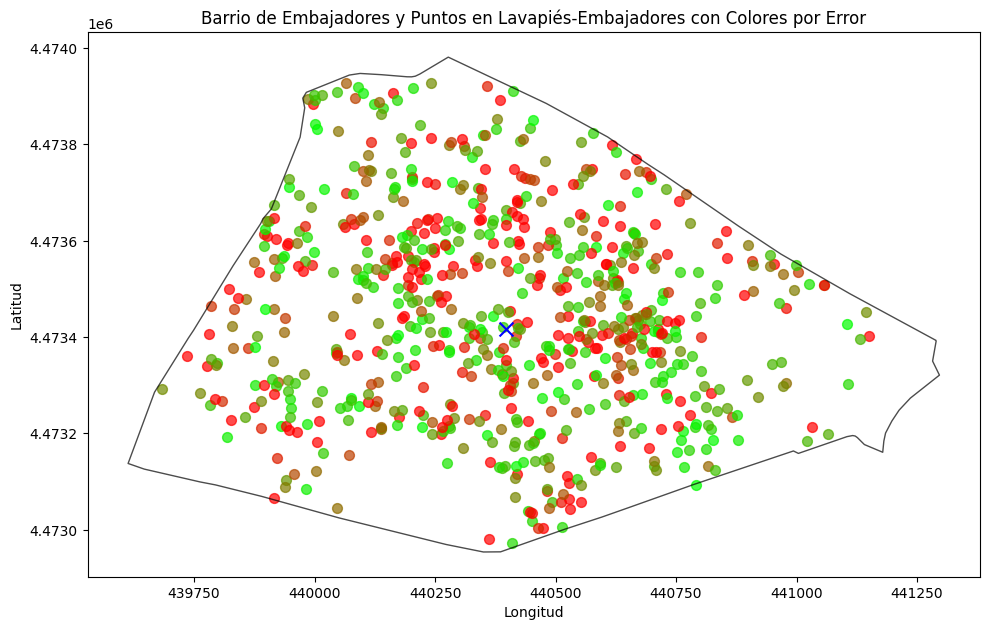

In [206]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Proyección de gdf_barrios_madrid (ETRS89 UTM zona 30N)
proyeccion_gdf = 'EPSG:25830'

# Convertir los puntos de df_test_evaluacion a un GeoDataFrame con proyección ETRS89 UTM zona 30N
geometry_puntos = [Point(xy) for xy in zip(df_test_evaluacion['longitud'], df_test_evaluacion['latitud'])]
geo_df_puntos = gpd.GeoDataFrame(df_test_evaluacion, geometry=geometry_puntos, crs='EPSG:4326')
geo_df_puntos = geo_df_puntos.to_crs(proyeccion_gdf)  # Proyectar a ETRS89 UTM zona 30N

# Filtrar solo el barrio 'Embajadores' y plotearlo
embajadores_geometry = gdf_barrios_madrid[gdf_barrios_madrid['NOMBRE'] == 'Embajadores']
ax = embajadores_geometry.boundary.plot(figsize=(10, 8), color='black', linewidth=1, alpha=0.7)

# Añadir puntos de df_test_evaluacion donde 'barrio' contiene 'Lavapiés-Embajadores'
lavapies_embajadores_points = geo_df_puntos[geo_df_puntos['barrio'].str.contains('Lavapiés-Embajadores')]

# Función para asignar colores basados en 'absolute_percentage_error'
def asignar_color(error):
    if error == 0:
        return 'green'
    elif error >= 15:
        return 'red'
    else:
        # Interpolación lineal entre verde y rojo para otros valores
        verde = 0, 255, 0  # RGB para verde
        rojo = 255, 0, 0  # RGB para rojo
        rango = 15  # Rango de error
        factor = min(1, error / rango)
        r = int(verde[0] + (rojo[0] - verde[0]) * factor)
        g = int(verde[1] + (rojo[1] - verde[1]) * factor)
        b = int(verde[2] + (rojo[2] - verde[2]) * factor)
        return (r / 255, g / 255, b / 255)  # Devolver el color en formato (R, G, B)

# Aplicar la función asignar_color a 'absolute_percentage_error' para obtener colores
colores = lavapies_embajadores_points['absolute_percentage_error'].apply(asignar_color)

# Plotear los puntos uno por uno con colores basados en 'absolute_percentage_error'
for i, punto in lavapies_embajadores_points.iterrows():
    color = colores[i]
    ax.scatter(punto.geometry.x, punto.geometry.y, color=color, s=50, alpha=0.7)

# Calcular el centroide de la geometría 'Embajadores'
centroide = embajadores_geometry.to_crs(proyeccion_gdf).centroid.values[0]
ax.scatter(centroide.x, centroide.y, color='blue', marker='x', s=100, label='Centroide')

# Añadir título y quitar leyenda
plt.title('Barrio de Embajadores y Puntos en Lavapiés-Embajadores con Colores por Error')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend().remove()  # Quitar leyenda
plt.tight_layout()
plt.show()

Mmmmm... difícil sacar patrón pero la idea es más o menos esta

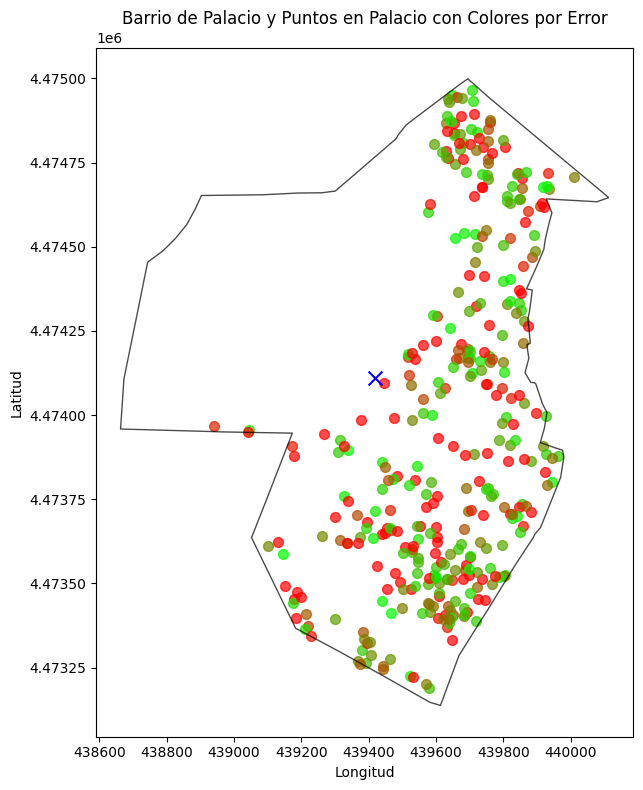

In [209]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Proyección de gdf_barrios_madrid (ETRS89 UTM zona 30N)
proyeccion_gdf = 'EPSG:25830'

# Convertir los puntos de df_test_evaluacion a un GeoDataFrame con proyección ETRS89 UTM zona 30N
geometry_puntos = [Point(xy) for xy in zip(df_test_evaluacion['longitud'], df_test_evaluacion['latitud'])]
geo_df_puntos = gpd.GeoDataFrame(df_test_evaluacion, geometry=geometry_puntos, crs='EPSG:4326')
geo_df_puntos = geo_df_puntos.to_crs(proyeccion_gdf)  # Proyectar a ETRS89 UTM zona 30N

# Filtrar solo el barrio 'Palacio' y plotearlo
palacio_geometry = gdf_barrios_madrid[gdf_barrios_madrid['NOMBRE'] == 'Palacio']
ax = palacio_geometry.boundary.plot(figsize=(10, 8), color='black', linewidth=1, alpha=0.7)

# Añadir puntos de df_test_evaluacion donde 'barrio' contiene 'Palacio'
palacio_points = geo_df_puntos[geo_df_puntos['barrio'].str.contains('Palacio')]

# Función para asignar colores basados en 'absolute_percentage_error'
def asignar_color(error):
    if error == 0:
        return 'green'
    elif error >= 15:
        return 'red'
    else:
        # Interpolación lineal entre verde y rojo para otros valores
        verde = 0, 255, 0  # RGB para verde
        rojo = 255, 0, 0  # RGB para rojo
        rango = 15  # Rango de error
        factor = min(1, error / rango)
        r = int(verde[0] + (rojo[0] - verde[0]) * factor)
        g = int(verde[1] + (rojo[1] - verde[1]) * factor)
        b = int(verde[2] + (rojo[2] - verde[2]) * factor)
        return (r / 255, g / 255, b / 255)  # Devolver el color en formato (R, G, B)

# Aplicar la función asignar_color a 'absolute_percentage_error' para obtener colores
colores = palacio_points['absolute_percentage_error'].apply(asignar_color)

# Plotear los puntos uno por uno con colores basados en 'absolute_percentage_error'
for i, punto in palacio_points.iterrows():
    color = colores[i]
    ax.scatter(punto.geometry.x, punto.geometry.y, color=color, s=50, alpha=0.7)

# Calcular el centroide de la geometría 'Palacio'
centroide = palacio_geometry.to_crs(proyeccion_gdf).centroid.values[0]
ax.scatter(centroide.x, centroide.y, color='blue', marker='x', s=100, label='Centroide')

# Añadir título y quitar leyenda
plt.title('Barrio de Palacio y Puntos en Palacio con Colores por Error')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend().remove()  # Quitar leyenda
plt.tight_layout()
plt.show()

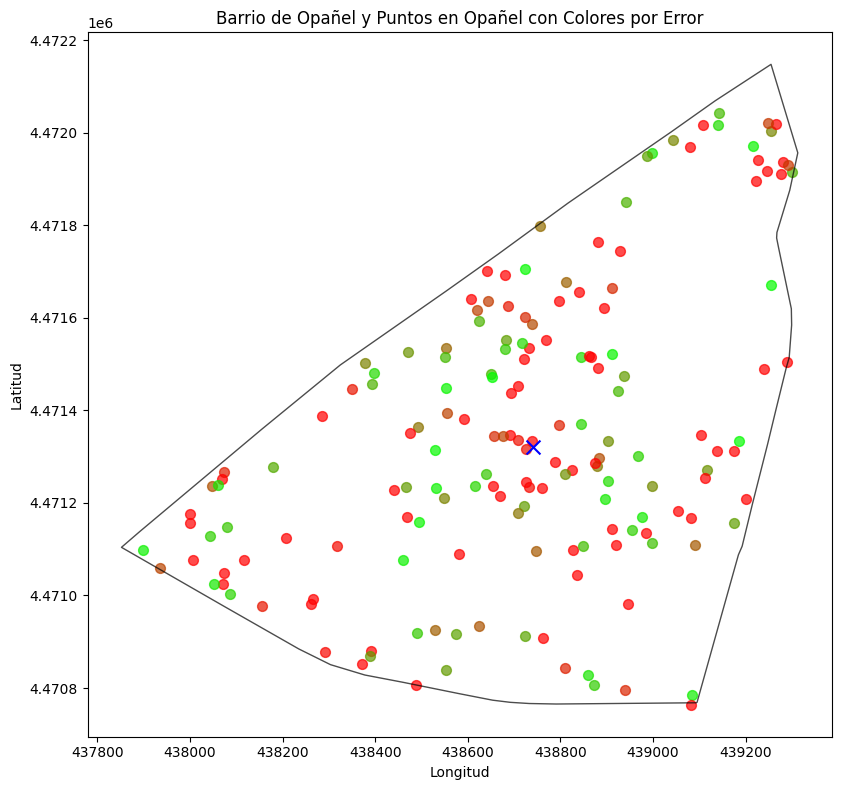

In [210]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Proyección de gdf_barrios_madrid (ETRS89 UTM zona 30N)
proyeccion_gdf = 'EPSG:25830'

# Convertir los puntos de df_test_evaluacion a un GeoDataFrame con proyección ETRS89 UTM zona 30N
geometry_puntos = [Point(xy) for xy in zip(df_test_evaluacion['longitud'], df_test_evaluacion['latitud'])]
geo_df_puntos = gpd.GeoDataFrame(df_test_evaluacion, geometry=geometry_puntos, crs='EPSG:4326')
geo_df_puntos = geo_df_puntos.to_crs(proyeccion_gdf)  # Proyectar a ETRS89 UTM zona 30N

# Filtrar solo el barrio 'Opañel' y plotearlo
opanel_geometry = gdf_barrios_madrid[gdf_barrios_madrid['NOMBRE'] == 'Opañel']
ax = opanel_geometry.boundary.plot(figsize=(10, 8), color='black', linewidth=1, alpha=0.7)

# Añadir puntos de df_test_evaluacion donde 'barrio' contiene 'Opañel'
opanel_points = geo_df_puntos[geo_df_puntos['barrio'].str.contains('Opañel')]

# Función para asignar colores basados en 'absolute_percentage_error'
def asignar_color(error):
    if error == 0:
        return 'green'
    elif error >= 15:
        return 'red'
    else:
        # Interpolación lineal entre verde y rojo para otros valores
        verde = 0, 255, 0  # RGB para verde
        rojo = 255, 0, 0  # RGB para rojo
        rango = 15  # Rango de error
        factor = min(1, error / rango)
        r = int(verde[0] + (rojo[0] - verde[0]) * factor)
        g = int(verde[1] + (rojo[1] - verde[1]) * factor)
        b = int(verde[2] + (rojo[2] - verde[2]) * factor)
        return (r / 255, g / 255, b / 255)  # Devolver el color en formato (R, G, B)

# Aplicar la función asignar_color a 'absolute_percentage_error' para obtener colores
colores = opanel_points['absolute_percentage_error'].apply(asignar_color)

# Plotear los puntos uno por uno con colores basados en 'absolute_percentage_error'
for i, punto in opanel_points.iterrows():
    color = colores[i]
    ax.scatter(punto.geometry.x, punto.geometry.y, color=color, s=50, alpha=0.7)

# Calcular el centroide de la geometría 'Opañel'
centroide = opanel_geometry.to_crs(proyeccion_gdf).centroid.values[0]
ax.scatter(centroide.x, centroide.y, color='blue', marker='x', s=100, label='Centroide')

# Añadir título y quitar leyenda
plt.title('Barrio de Opañel y Puntos en Opañel con Colores por Error')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend().remove()  # Quitar leyenda
plt.tight_layout()
plt.show()

### Gráficas para los ejemplos de la memoria

Filas con mayores errores después de quitar las 250 y los outliers:
         Ajustados  Residuos_Escalados  ID_fila  Abs_Residuos_Escalados
3144   6581.223176           -1.544813     3144                1.544813
1442   4774.766742           -1.542649     1442                1.542649
11938  4375.927119           -1.540936    11938                1.540936
5965   4369.748917           -1.539443     5965                1.539443
15630  2247.973362           -1.537960    15630                1.537960


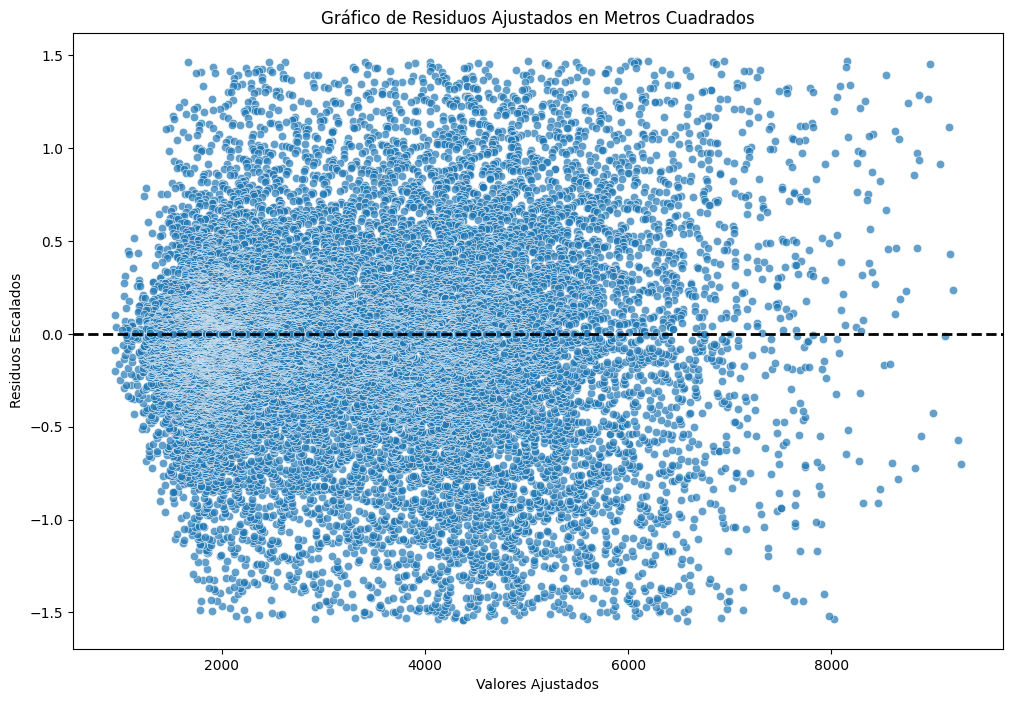

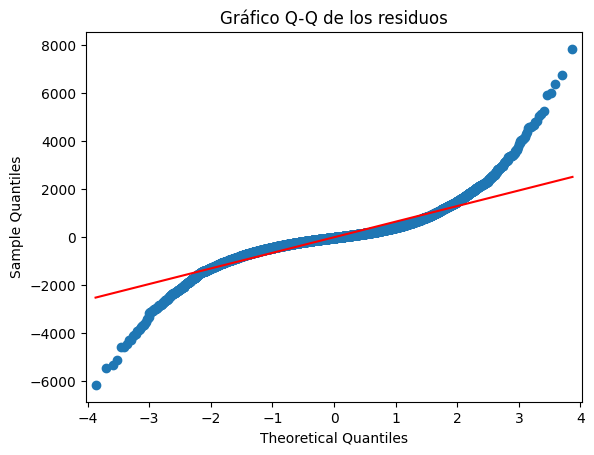

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

# Calcular los residuos
residuos_originales = filtered_df_test_evaluation['precio_unitario_m2'] - filtered_df_test_evaluation['predicciones']

# Escalar los residuos dividiendo por la desviación estándar
residuos_escalados = residuos_originales / np.std(residuos_originales)

# Crear un DataFrame para facilitar la identificación de las filas
df_residuos = pd.DataFrame({'Ajustados': filtered_df_test_evaluation['predicciones'], 'Residuos_Escalados': residuos_escalados, 'ID_fila': filtered_df_test_evaluation.index})

# Ordenar por valor absoluto de residuos escalados para obtener las filas con mayores errores
df_residuos['Abs_Residuos_Escalados'] = np.abs(df_residuos['Residuos_Escalados'])
df_residuos = df_residuos.sort_values(by='Abs_Residuos_Escalados', ascending=False)

# Excluir las 250 filas con mayores errores
df_residuos = df_residuos.iloc[250:]

# Identificar y eliminar outliers
Q1 = df_residuos['Residuos_Escalados'].quantile(0.25)
Q3 = df_residuos['Residuos_Escalados'].quantile(0.75)
IQR = Q3 - Q1

# Filtrar los valores que están dentro del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
df_residuos_filtrado = df_residuos[(df_residuos['Residuos_Escalados'] >= (Q1 - 1.5 * IQR)) & (df_residuos['Residuos_Escalados'] <= (Q3 + 1.5 * IQR))]

# Obtener las 5 filas con mayores errores después de quitar las 250 y los outliers
filas_con_mayor_error = df_residuos_filtrado.head(5)

print("Filas con mayores errores después de quitar las 250 y los outliers:")
print(filas_con_mayor_error)

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Ajustados', y='Residuos_Escalados', data=df_residuos_filtrado, palette='viridis', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)  # Línea horizontal en y=0
plt.title('Gráfico de Residuos Ajustados en Metros Cuadrados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos Escalados')
plt.show()

# Crear un gráfico Q-Q de los residuos
sm.qqplot(df_test_evaluacion['precio_unitario_m2'] - df_test_evaluacion['predicciones'], line='s')
plt.title('Gráfico Q-Q de los residuos')
plt.show()

Filas con mayores errores después de quitar las 250 y los outliers:
         Ajustados  Residuos_Escalados  ID_fila  Abs_Residuos_Escalados
3144   6581.223176           -1.544813     3144                1.544813
1442   4774.766742           -1.542649     1442                1.542649
11938  4375.927119           -1.540936    11938                1.540936
5965   4369.748917           -1.539443     5965                1.539443
15630  2247.973362           -1.537960    15630                1.537960


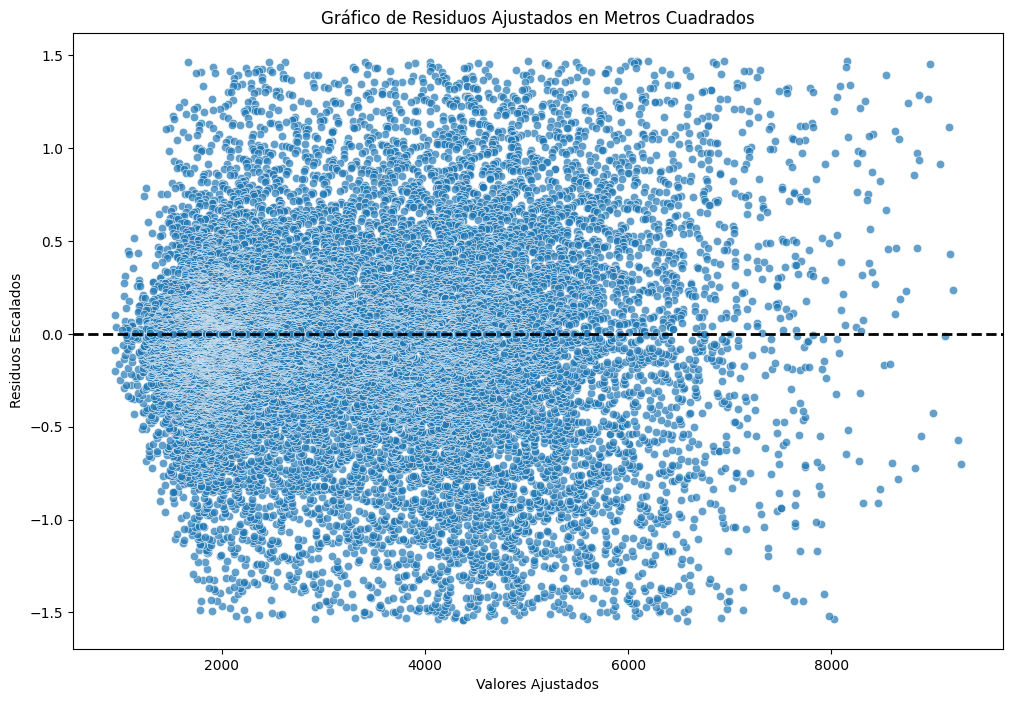

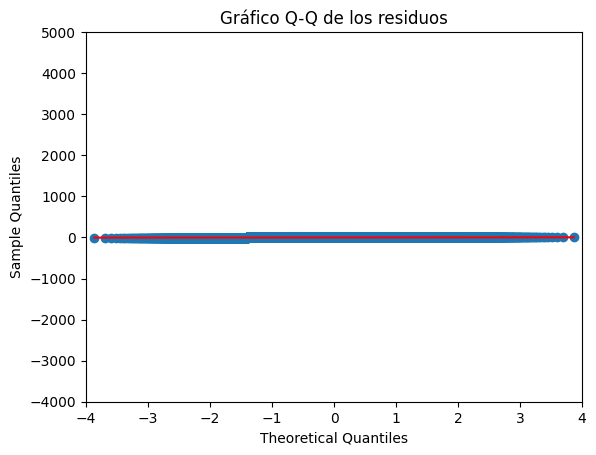

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

# Calcular los residuos
residuos_originales = filtered_df_test_evaluation['precio_unitario_m2'] - filtered_df_test_evaluation['predicciones']

# Escalar los residuos dividiendo por la desviación estándar
residuos_escalados = residuos_originales / np.std(residuos_originales)

# Crear un DataFrame para facilitar la identificación de las filas
df_residuos = pd.DataFrame({'Ajustados': filtered_df_test_evaluation['predicciones'], 'Residuos_Escalados': residuos_escalados, 'ID_fila': filtered_df_test_evaluation.index})

# Ordenar por valor absoluto de residuos escalados para obtener las filas con mayores errores
df_residuos['Abs_Residuos_Escalados'] = np.abs(df_residuos['Residuos_Escalados'])
df_residuos = df_residuos.sort_values(by='Abs_Residuos_Escalados', ascending=False)

# Excluir las 250 filas con mayores errores
df_residuos = df_residuos.iloc[250:]

# Identificar y eliminar outliers
Q1 = df_residuos['Residuos_Escalados'].quantile(0.25)
Q3 = df_residuos['Residuos_Escalados'].quantile(0.75)
IQR = Q3 - Q1

# Filtrar los valores que están dentro del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
df_residuos_filtrado = df_residuos[(df_residuos['Residuos_Escalados'] >= (Q1 - 1.5 * IQR)) & (df_residuos['Residuos_Escalados'] <= (Q3 + 1.5 * IQR))]

# Obtener las 5 filas con mayores errores después de quitar las 250 y los outliers
filas_con_mayor_error = df_residuos_filtrado.head(5)

print("Filas con mayores errores después de quitar las 250 y los outliers:")
print(filas_con_mayor_error)

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Ajustados', y='Residuos_Escalados', data=df_residuos_filtrado, palette='viridis', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)  # Línea horizontal en y=0
plt.title('Gráfico de Residuos Ajustados en Metros Cuadrados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos Escalados')
plt.show()

# Filtrar los residuos para el gráfico Q-Q
residuos_filtrados_qq = residuos_escalados[(residuos_escalados >= -500) & (residuos_escalados <= 1500)]

# Crear un gráfico Q-Q de los residuos filtrados
sm.qqplot(residuos_escalados, line='s')
plt.xlim(-4, 4)  # Limitar el eje x entre -4 y 4 para una mejor visualización
plt.ylim(-4000, 5000)  # Limitar el eje y entre -4000 y 5000 para una mejor visualización
plt.title('Gráfico Q-Q de los residuos')
plt.show()
